# Project: Using NASDAQ data

This project uses data from https://data.nasdaq.com/ (formerly Quandl API). The API key is stored in an .env file. 

In [17]:
# Import the relevant modules
import requests
import collections
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from dotenv import load_dotenv  # if missing this module, simply run `pip install python-dotenv`

# get api key from your .env file
load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')
print(API_KEY)

Eo2wykp2L6AzWT3z4EUt


Note: API's can change a bit with each version, for this exercise it is reccomended to use the nasdaq api at `https://data.nasdaq.com/api/v3/`. This is the same api as what used to be quandl so `https://www.quandl.com/api/v3/` should work too.

Hint: We are looking for the `AFX_X` data on the `datasets/FSE/` dataset.

<h3>Example</h3>

In [18]:
# Now, call the Nasdaq API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
dataset_code = "FSE/AFX_X"
start_date = "2017-01-01"
end_date = "2017-12-31"


# Replace "API_KEY" with actual Nasdaq Data Link API key
url = f"https://data.nasdaq.com/api/v3/datasets/{dataset_code}?start_date={start_date}&end_date={end_date}&api_key={API_KEY}"

response = requests.get(url)
response.raise_for_status()  # Raise an error if the request fails

data = response.json()

<p>Inspect JSON structure</p>

In [19]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

print(json.dumps(
    data,
    sort_keys=True,
    indent=4,
    separators=(',', ': ')
))

{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "Open",
            "High",
            "Low",
            "Close",
            "Change",
            "Traded Volume",
            "Turnover",
            "Last Price of the Day",
            "Daily Traded Units",
            "Daily Turnover"
        ],
        "data": [
            [
                "2017-12-29",
                51.76,
                51.94,
                51.45,
                51.76,
                null,
                34640.0,
                1792304.0,
                null,
                null,
                null
            ],
            [
                "2017-12-28",
                51.65,
                51.82,
                51.43,
                51.6,
                null,
                40660.0,
                2099024.0,
                null,
                null,
                null
            ],
            [
  

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

## 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD)

In [27]:
start_date = "2017-01-01"
end_date = "2017-12-31"
dataset_code = "FSE/AFX_X"
url = f"https://data.nasdaq.com/api/v3/datasets/{dataset_code}?start_date={start_date}&end_date={end_date}&api_key={API_KEY}"

response = requests.get(url)
response.raise_for_status()  # Raise an error if the request fails
response.status_code

200

## 2. Convert the returned JSON object into a Python dictionary.

<class 'dict'>


Text(0.5, 1.0, 'The Closing Price of Frankfurt Stock Exchange in 2017')

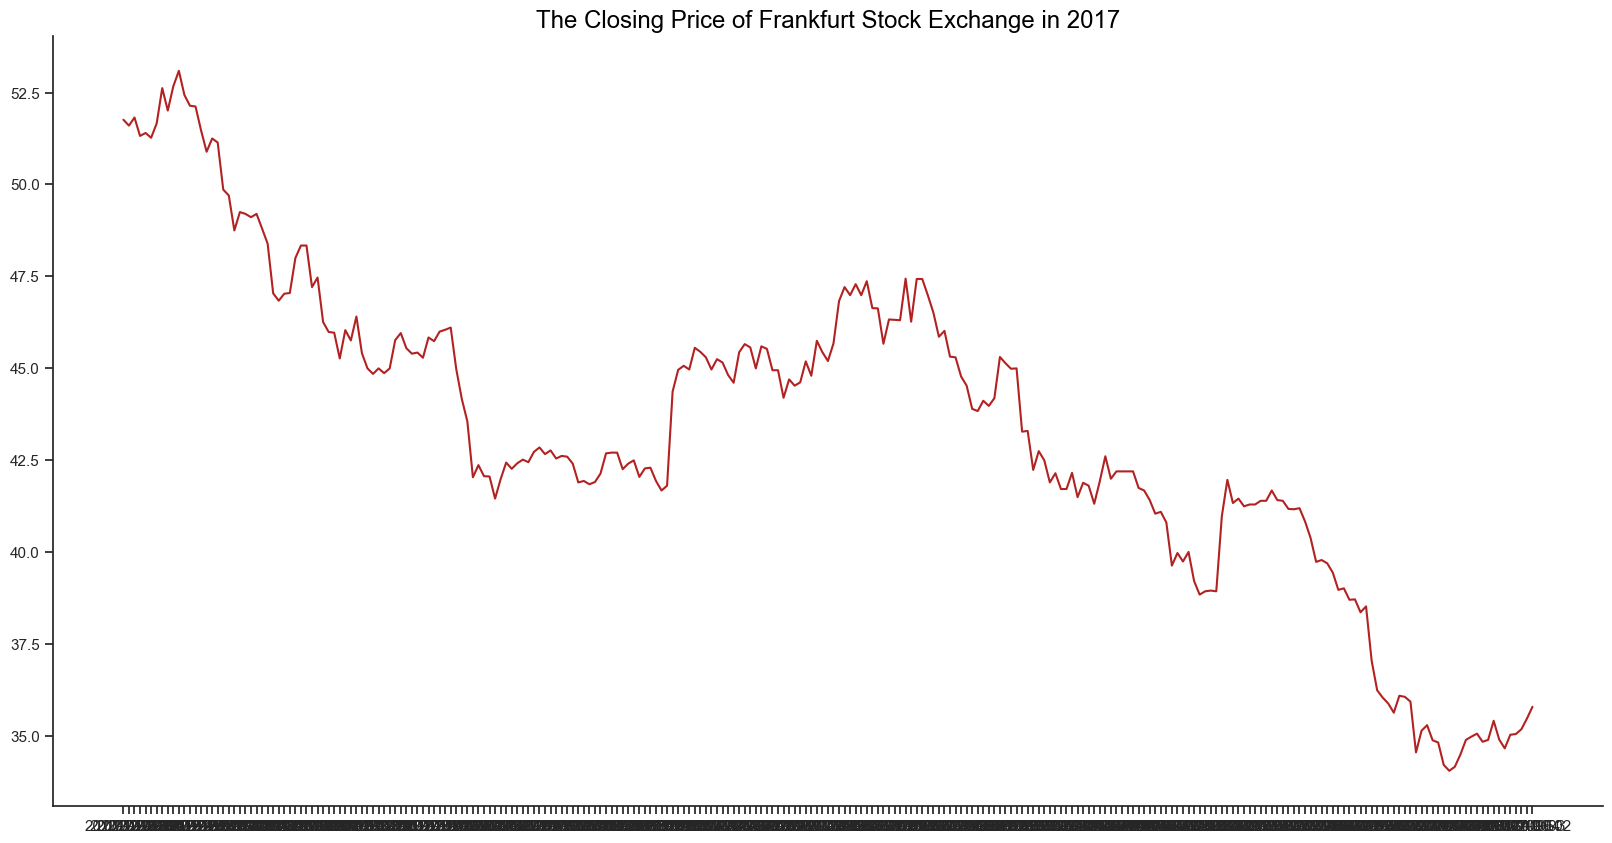

In [39]:
data = response.json()
#print(json.dumps(data, sort_keys=True, indent=4, separators=(',', ': ')))
print(type(data))

plt.figure(figsize=(20,10))
sns.set_style("ticks", {"ytick.major.size": 1000})
date = data['dataset']['column_names'].index('Date')
dates = [day[date] for day in data['dataset']['data']]
close = data['dataset']['column_names'].index('Close')
closing = [day[close] for day in data['dataset']['data']]
sns.lineplot(data=data,x=dates,y=closing,color='firebrick')
sns.despine()
plt.title("The Closing Price of Frankfurt Stock Exchange in 2017",size='x-large',color='black')

## 3. Calculate what the highest and lowest opening prices were for the stock in this period.

In [ ]:

open_prices = [daily[1] for daily in data['dataset']['data'] if daily[1] != None]
max_open = str(max(open_prices))
min_open = str(min(open_prices))
print('The highest opening price was $' + max_open + ' and the lowest opening price was $' + min_open + ' in 2017.')

## 4. What was the largest change in any one day (based on High and Low price)?

In [ ]:
#Find the index of high and low prices
high = data['dataset']['column_names'].index('High')
low = data['dataset']['column_names'].index('Low')
#Calculate change
change = [day[high]-day[low] for day in data['dataset']['data']]
print('The largest change in any one day in 2017 was {:.2f}'.format(max(change)))

## 5. What was the largest change between any two days (based on Closing Price)?

In [ ]:
#Find the index of closing price
close = data['dataset']['column_names'].index('Close')
#Grab closing price
closing = [day[close] for day in data['dataset']['data']]
#Calculate change in price between day and the day before loop
change_two_days = [abs(closing[index]-closing[index-1]) for index, value in enumerate(closing) if index > 0]
print('The largest change between any two days in 2017 was {:.2f}'.format(max(change_two_days)))

## 6. What was the average daily trading volume during this year?

The average daily trading volumne in 2017 was 89124.34


Text(0.5, 1.0, 'The Stock Price of Frankfurt Stock Exchange')

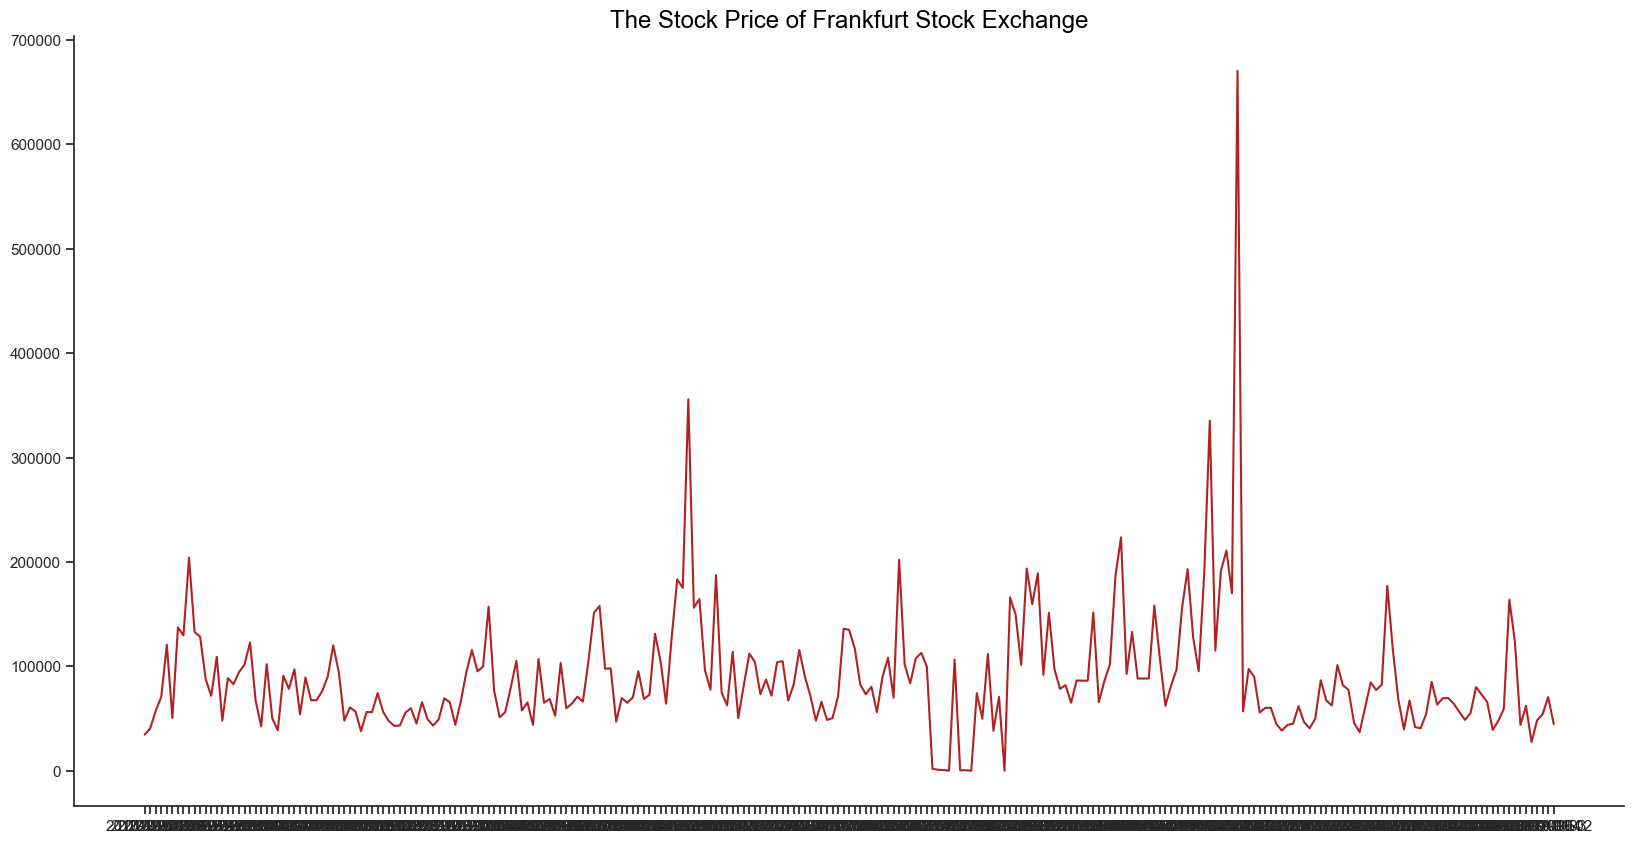

In [38]:
#Find the index of volume
traded_volume = data['dataset']['column_names'].index('Traded Volume')
#Extract trading volume
volume = [day[traded_volume] for day in data['dataset']['data']]
#Calculate average total volume divided by total number
average_volume = sum(volume)/len(volume)
print('The average daily trading volumne in 2017 was {:.2f}'.format(average_volume))

plt.figure(figsize=(20,10))
sns.set_style("ticks", {"ytick.major.size": 1000})
date = data['dataset']['column_names'].index('Date')
dates = [day[date] for day in data['dataset']['data']]
close = data['dataset']['column_names'].index('Traded Volume')
closing = [day[close] for day in data['dataset']['data']]
sns.lineplot(data=data,x=dates,y=closing,color='firebrick')
sns.despine()
plt.title("The Traded Volume of Frankfurt Stock Exchange in 2017",size='x-large',color='black')

## 7. What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [ ]:
#Sort volume ascending
volume = sorted(volume)
#Find median through analog calculations
if len(volume) % 2 == 1:
    median_volume = volume[len(volume)//2]
else:
    median_volume = (volume[len(volume)//2] + volume[len(volume)//2-1]) / 2
print('The median trading volume in 2017 was {:.2f}'.format(median_volume))